In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import statsmodels.api as sm

In [2]:
df=pd.read_csv("minute_weather.csv",parse_dates=["hpwren_timestamp"])

In [3]:
df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587257 entries, 0 to 1587256
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   rowID               1587257 non-null  int64         
 1   hpwren_timestamp    1587257 non-null  datetime64[ns]
 2   air_pressure        1587257 non-null  float64       
 3   air_temp            1587257 non-null  float64       
 4   avg_wind_direction  1586824 non-null  float64       
 5   avg_wind_speed      1586824 non-null  float64       
 6   max_wind_direction  1586824 non-null  float64       
 7   max_wind_speed      1586824 non-null  float64       
 8   min_wind_direction  1586824 non-null  float64       
 9   min_wind_speed      1586824 non-null  float64       
 10  rain_accumulation   1587256 non-null  float64       
 11  rain_duration       1587256 non-null  float64       
 12  relative_humidity   1587257 non-null  float64       
dtypes: datetime6

In [5]:
df.isnull().sum()

rowID                   0
hpwren_timestamp        0
air_pressure            0
air_temp                0
avg_wind_direction    433
avg_wind_speed        433
max_wind_direction    433
max_wind_speed        433
min_wind_direction    433
min_wind_speed        433
rain_accumulation       1
rain_duration           1
relative_humidity       0
dtype: int64

In [6]:
df.nunique()

rowID                 1587257
hpwren_timestamp      1554478
air_pressure              246
air_temp                  378
avg_wind_direction        360
avg_wind_speed            244
max_wind_direction        360
max_wind_speed            266
min_wind_direction        360
min_wind_speed            222
rain_accumulation         120
rain_duration              16
relative_humidity         924
dtype: int64

In [7]:
df.set_index(["hpwren_timestamp"])

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
hpwren_timestamp,,,,,,,,,,,,
2011-09-10 00:00:49,0,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
2011-09-10 00:01:49,1,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2011-09-10 00:02:49,2,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
2011-09-10 00:03:49,3,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
2011-09-10 00:04:49,4,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-10 23:55:29,1587252,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,0.0,0.0,46.3
2014-09-10 23:56:29,1587253,915.9,74.66,9.0,1.6,19.0,1.8,353.0,1.4,0.0,0.0,46.2
2014-09-10 23:57:29,1587254,915.9,74.66,15.0,1.7,42.0,2.3,353.0,1.2,0.0,0.0,46.3


In [8]:
df.drop(columns="rowID",axis=1,inplace=True)

In [9]:
df.set_index(["hpwren_timestamp"],inplace=True)

In [10]:
df.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587257e+06,1.587257e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.587256e+06,1.587256e+06,1.587257e+06
mean,9.168301e+02,6.185144e+01,1.619654e+02,2.774272e+00,1.634030e+02,3.399813e+00,1.668264e+02,2.133130e+00,1.854836e-03,5.361460e-01,4.760837e+01
std,3.051593e+00,1.183362e+01,9.520812e+01,2.060758e+00,9.236723e+01,2.423167e+00,9.746275e+01,1.745345e+00,9.609716e-01,8.114766e+01,2.621454e+01
min,9.050000e+02,3.164000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01
25%,9.148000e+02,5.270000e+01,6.200000e+01,1.300000e+00,6.800000e+01,1.600000e+00,7.700000e+01,8.000000e-01,0.000000e+00,0.000000e+00,2.470000e+01
50%,9.167000e+02,6.224000e+01,1.820000e+02,2.200000e+00,1.870000e+02,2.700000e+00,1.800000e+02,1.600000e+00,0.000000e+00,0.000000e+00,4.470000e+01
75%,9.187000e+02,7.088000e+01,2.170000e+02,3.800000e+00,2.230000e+02,4.600000e+00,2.120000e+02,3.000000e+00,0.000000e+00,0.000000e+00,6.800000e+01
max,9.295000e+02,9.950000e+01,3.590000e+02,3.230000e+01,3.590000e+02,3.600000e+01,3.590000e+02,3.200000e+01,6.550100e+02,6.330500e+04,9.300000e+01


In [11]:
df.tail()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
hpwren_timestamp,,,,,,,,,,,
2014-09-10 23:55:29,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,0.0,0.0,46.3
2014-09-10 23:56:29,915.9,74.66,9.0,1.6,19.0,1.8,353.0,1.4,0.0,0.0,46.2
2014-09-10 23:57:29,915.9,74.66,15.0,1.7,42.0,2.3,353.0,1.2,0.0,0.0,46.3
2014-09-10 23:58:29,915.9,74.66,8.0,1.8,24.0,2.2,355.0,1.4,0.0,0.0,46.2
2014-09-10 23:59:29,915.9,74.66,12.0,1.9,21.0,2.2,357.0,1.5,0.0,0.0,46.3


In [12]:
df.index[0]-df.index[-1]

Timedelta('-1097 days +00:01:20')

# Observations
- data is big ( 1M rows)
- this is 3 year data from 2011 to 2014 
- the data is calculated every minute
- since no. of null is very less than the data we can drop it
- the wind has blow through every direction 0 (north) to 360 !
- rain_duration (16 unique values) can be considered as the only categorical column

# Info on the variables- 
- avg_wind_direction: wind direction averaged over the minute before the timestamp (Unit: degrees, with 0 means coming from the North, and increasing clockwise)
- rain_duration: length of time rain has fallen as measured at the timestamp (Unit: seconds)

# EDA

In [13]:
df.shape

(1587257, 11)

# since it is a big data we will take the recent data of only 1 year sepreted by  2minutes

In [14]:
df_14=df.loc["2014"]

In [15]:
df_14=df_14.iloc[::2,:]

In [16]:
df_14.shape

(181922, 11)

In [17]:
df_14.isnull().sum()

air_pressure           0
air_temp               0
avg_wind_direction    84
avg_wind_speed        84
max_wind_direction    84
max_wind_speed        84
min_wind_direction    84
min_wind_speed        84
rain_accumulation      0
rain_duration          0
relative_humidity      0
dtype: int64

In [18]:
df_14.dropna(inplace=True)

In [19]:
df_14

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
hpwren_timestamp,,,,,,,,,,,
2014-01-01 00:00:11,919.9,57.56,314.0,0.1,339.0,0.3,291.0,0.0,0.0,0.0,17.0
2014-01-01 00:02:11,919.9,57.56,210.0,0.3,234.0,0.5,169.0,0.2,0.0,0.0,17.0
2014-01-01 00:04:11,919.8,57.38,205.0,1.4,211.0,1.5,202.0,1.2,0.0,0.0,16.7
2014-01-01 00:06:11,919.9,57.38,232.0,0.7,235.0,0.8,221.0,0.6,0.0,0.0,16.8
2014-01-01 00:08:11,919.9,57.38,252.0,0.4,258.0,0.5,247.0,0.3,0.0,0.0,16.5
...,...,...,...,...,...,...,...,...,...,...,...
2014-09-10 23:51:29,915.9,74.84,0.0,1.3,12.0,1.6,346.0,1.0,0.0,0.0,45.8
2014-09-10 23:53:29,915.9,74.84,6.0,1.5,20.0,1.9,349.0,1.1,0.0,0.0,46.1
2014-09-10 23:55:29,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,0.0,0.0,46.3


In [20]:
df_14.describe()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,181838.000000,181838.000000,181838.000000,181838.000000,181838.000000,181838.000000,181838.000000,181838.000000,181838.000000,181838.000000,181838.000000
mean,916.831628,63.793698,167.779073,2.738307,171.495985,3.344286,169.943021,2.111355,0.003337,0.451556,46.506055
std,2.689097,10.532439,89.339707,2.015508,87.893321,2.373762,90.854483,1.706342,1.315382,74.431966,26.072763
min,906.400000,38.300000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.700000
25%,915.000000,56.120000,82.000000,1.200000,81.000000,1.600000,109.000000,0.800000,0.000000,0.000000,23.800000
50%,916.800000,65.120000,185.000000,2.200000,190.000000,2.800000,181.000000,1.700000,0.000000,0.000000,44.900000
75%,918.600000,71.780000,216.000000,3.800000,223.000000,4.500000,210.000000,3.000000,0.000000,0.000000,66.700000
max,927.000000,93.560000,359.000000,30.500000,359.000000,36.000000,359.000000,29.900000,560.900000,31701.000000,91.300000


In [21]:
df_14.describe()["rain_duration"]# something intresting with the data if we view Percentiles

count    181838.000000
mean          0.451556
std          74.431966
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       31701.000000
Name: rain_duration, dtype: float64

In [22]:
df_14.loc[df_14['rain_accumulation'] == 0]

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
hpwren_timestamp,,,,,,,,,,,
2014-01-01 00:00:11,919.9,57.56,314.0,0.1,339.0,0.3,291.0,0.0,0.0,0.0,17.0
2014-01-01 00:02:11,919.9,57.56,210.0,0.3,234.0,0.5,169.0,0.2,0.0,0.0,17.0
2014-01-01 00:04:11,919.8,57.38,205.0,1.4,211.0,1.5,202.0,1.2,0.0,0.0,16.7
2014-01-01 00:06:11,919.9,57.38,232.0,0.7,235.0,0.8,221.0,0.6,0.0,0.0,16.8
2014-01-01 00:08:11,919.9,57.38,252.0,0.4,258.0,0.5,247.0,0.3,0.0,0.0,16.5
...,...,...,...,...,...,...,...,...,...,...,...
2014-09-10 23:51:29,915.9,74.84,0.0,1.3,12.0,1.6,346.0,1.0,0.0,0.0,45.8
2014-09-10 23:53:29,915.9,74.84,6.0,1.5,20.0,1.9,349.0,1.1,0.0,0.0,46.1
2014-09-10 23:55:29,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,0.0,0.0,46.3


In [23]:
181062/len(df_14)

0.9957324651612974

## 99% of the times it doesnt rain at all

In [24]:
df_14.loc[df_14['rain_accumulation'] > 0].sort_values(by="rain_duration")

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
hpwren_timestamp,,,,,,,,,,,
2014-02-28 11:42:24,908.5,54.14,195.0,10.3,221.0,14.7,179.0,6.2,0.01,0.0,89.3
2014-02-27 05:38:23,916.6,48.74,166.0,4.8,180.0,6.4,136.0,3.4,0.01,0.0,90.2
2014-07-24 17:16:35,913.3,86.18,283.0,2.1,285.0,2.3,280.0,2.0,0.01,0.0,13.8
2014-02-28 14:08:24,908.2,53.78,176.0,8.9,187.0,10.2,160.0,7.6,0.01,0.0,90.1
2014-02-28 03:36:23,908.8,52.88,181.0,10.9,191.0,12.6,175.0,9.0,0.01,0.0,86.6
...,...,...,...,...,...,...,...,...,...,...,...
2014-03-01 16:36:24,911.5,46.58,205.0,6.0,211.0,7.1,189.0,5.3,0.02,60.0,86.5
2014-02-28 07:50:24,910.3,54.14,157.0,5.8,185.0,9.8,99.0,3.3,0.10,60.0,90.1
2014-03-01 09:32:24,912.0,45.14,186.0,6.5,194.0,7.5,175.0,5.5,0.02,60.0,91.2


## droping the outlier with rainfall of 560 and duration of 31701


In [25]:
df_14=df_14.loc[df_14['rain_accumulation'] <=60]

In [26]:
df_14

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
hpwren_timestamp,,,,,,,,,,,
2014-01-01 00:00:11,919.9,57.56,314.0,0.1,339.0,0.3,291.0,0.0,0.0,0.0,17.0
2014-01-01 00:02:11,919.9,57.56,210.0,0.3,234.0,0.5,169.0,0.2,0.0,0.0,17.0
2014-01-01 00:04:11,919.8,57.38,205.0,1.4,211.0,1.5,202.0,1.2,0.0,0.0,16.7
2014-01-01 00:06:11,919.9,57.38,232.0,0.7,235.0,0.8,221.0,0.6,0.0,0.0,16.8
2014-01-01 00:08:11,919.9,57.38,252.0,0.4,258.0,0.5,247.0,0.3,0.0,0.0,16.5
...,...,...,...,...,...,...,...,...,...,...,...
2014-09-10 23:51:29,915.9,74.84,0.0,1.3,12.0,1.6,346.0,1.0,0.0,0.0,45.8
2014-09-10 23:53:29,915.9,74.84,6.0,1.5,20.0,1.9,349.0,1.1,0.0,0.0,46.1
2014-09-10 23:55:29,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,0.0,0.0,46.3


<AxesSubplot:>

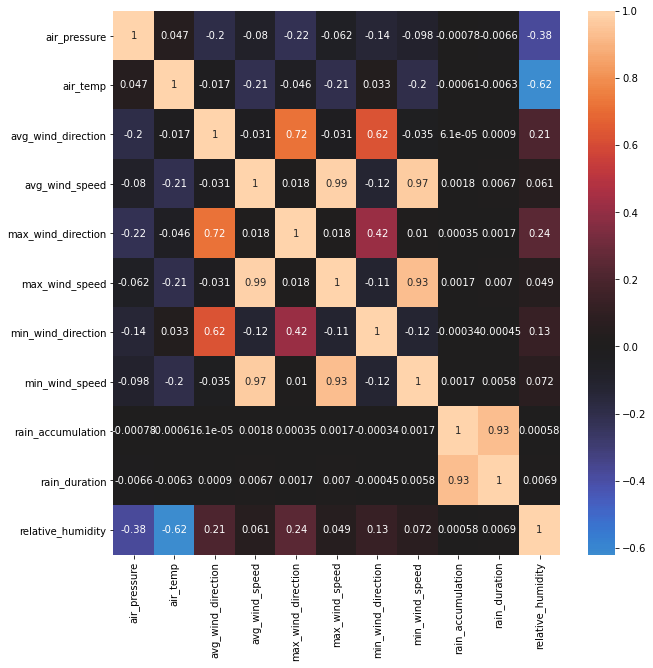

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,center=0)

## Select Features of Interest for Clustering

In [28]:
df_14.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'min_wind_direction',
       'min_wind_speed', 'rain_accumulation', 'rain_duration',
       'relative_humidity'],
      dtype='object')

In [29]:
# looking and correlation matrix and low data of rainfall

# selected features are
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [30]:
final_df=df_14[features]

In [31]:
final_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
hpwren_timestamp,,,,,,,
2014-01-01 00:00:11,919.9,57.56,314.0,0.1,339.0,0.3,17.0
2014-01-01 00:02:11,919.9,57.56,210.0,0.3,234.0,0.5,17.0
2014-01-01 00:04:11,919.8,57.38,205.0,1.4,211.0,1.5,16.7
2014-01-01 00:06:11,919.9,57.38,232.0,0.7,235.0,0.8,16.8
2014-01-01 00:08:11,919.9,57.38,252.0,0.4,258.0,0.5,16.5
...,...,...,...,...,...,...,...
2014-09-10 23:51:29,915.9,74.84,0.0,1.3,12.0,1.6,45.8
2014-09-10 23:53:29,915.9,74.84,6.0,1.5,20.0,1.9,46.1
2014-09-10 23:55:29,915.9,74.66,1.0,1.8,11.0,2.1,46.3


In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
X = StandardScaler().fit_transform(final_df)


In [34]:
X

array([[ 1.14104113, -0.59185264,  1.63669496, ...,  1.90577956,
        -1.2824762 , -1.13169454],
       [ 1.14104113, -0.59185264,  0.47259557, ...,  0.71114462,
        -1.19822172, -1.13169454],
       [ 1.10385392, -0.60894277,  0.41662926, ...,  0.44946269,
        -0.7769493 , -1.14320086],
       ...,
       [-0.34644717,  1.03171033, -1.86679646, ..., -1.82603243,
        -0.52418585, -0.00791066],
       [-0.34644717,  1.03171033, -1.71009078, ..., -1.47333068,
        -0.43993136, -0.00791066],
       [-0.34644717,  1.03171033, -1.74367057, ..., -1.71225767,
        -0.4820586 , -0.00791066]])

# Use k-Means Clustering

In [35]:
from sklearn.cluster import KMeans

In [36]:
#choosing the no. of clusters (k)

In [37]:
cluster_score=[]
for i in range(1,10):
    model=KMeans(n_clusters=i,init="random",random_state=42)
    model.fit(X)
    cluster_score.append(model.inertia_)

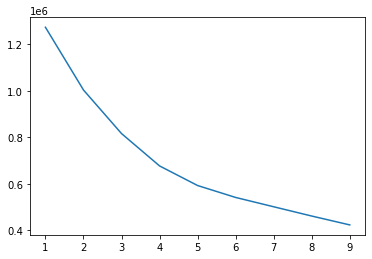

In [39]:
plt.plot(range(1,10),cluster_score)
plt.show()

##### from the elbow diagram we can take the number of cluster =5

In [40]:
final_model=KMeans(n_clusters=5)

In [41]:
final_model.fit(X)

KMeans(n_clusters=5)

In [42]:
centers=final_model.cluster_centers_

In [43]:
pred=final_model.predict(X)

In [44]:
pred.shape

(181837,)

In [45]:
X=pd.DataFrame(X,columns=features) 

In [46]:
X["Cluster"]= pred

In [47]:
X

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,Cluster
0,1.141041,-0.591853,1.636695,-1.309006,1.905780,-1.282476,-1.131695,2
1,1.141041,-0.591853,0.472596,-1.209775,0.711145,-1.198222,-1.131695,2
2,1.103854,-0.608943,0.416629,-0.664007,0.449463,-0.776949,-1.143201,2
3,1.141041,-0.608943,0.718847,-1.011314,0.722522,-1.071840,-1.139365,2
4,1.141041,-0.608943,0.942713,-1.160160,0.984204,-1.198222,-1.150872,2
...,...,...,...,...,...,...,...,...
181832,-0.346447,1.048800,-1.877990,-0.713622,-1.814655,-0.734822,-0.027088,1
181833,-0.346447,1.048800,-1.810830,-0.614391,-1.723635,-0.608440,-0.015582,1
181834,-0.346447,1.031710,-1.866796,-0.465546,-1.826032,-0.524186,-0.007911,1
181835,-0.346447,1.031710,-1.710091,-0.515161,-1.473331,-0.439931,-0.007911,1


<Figure size 1440x720 with 0 Axes>

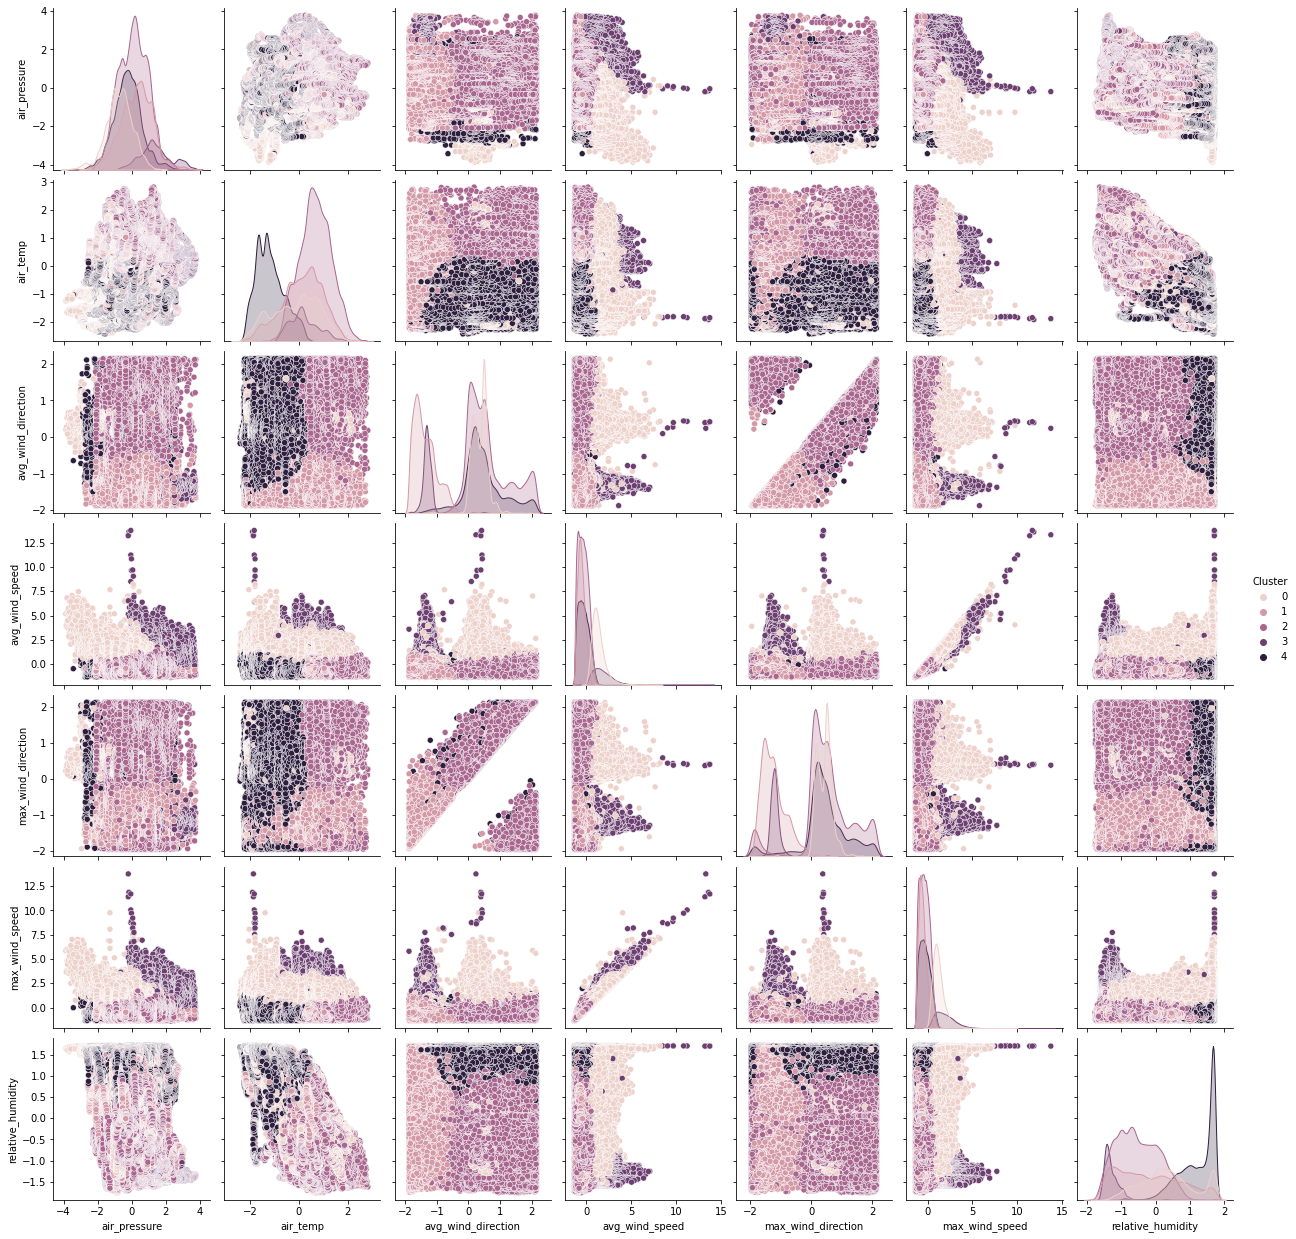

In [48]:
plt.figure(figsize=(20,10))
sns.pairplot(X,hue="Cluster")